Raw Data Overview:
       id              name                   email  \
0  692689     Jessica Adams  smithsheryl@hanson.biz   
1  220529  Kelly Livingston      carrie72@yahoo.com   
2  652801      Sarah Miller  harmonstacy@medina.com   
3  810775         Gina Wise  silvaclinton@yahoo.com   
4  383754        Danny Hull        kclark@yahoo.com   

                                             address  \
0  956 Shane Station, North Shelly, Georgia, 0453...   
1  378 Brown Union, Andreaberg, Louisiana, 80123,...   
2  083 Castro Mills, Lake John, Minnesota, 46746,...   
3  12913 Ramirez Route, New Matthew, Georgia, 857...   
4  553 Gregory Tunnel, South Barbara, Washington,...   

                                            address2  amount_spent  \
0  313 Miller Terrace Suite 433, Vaughnton, DE 62276       8288.46   
1  853 Barrera Forges Apt. 774, South Edwintown, ...       6136.34   
2    968 Smith Ridge Apt. 477, Patrickberg, IN 50158      12322.27   
3  901 Johnson Parkways Apt. 145,

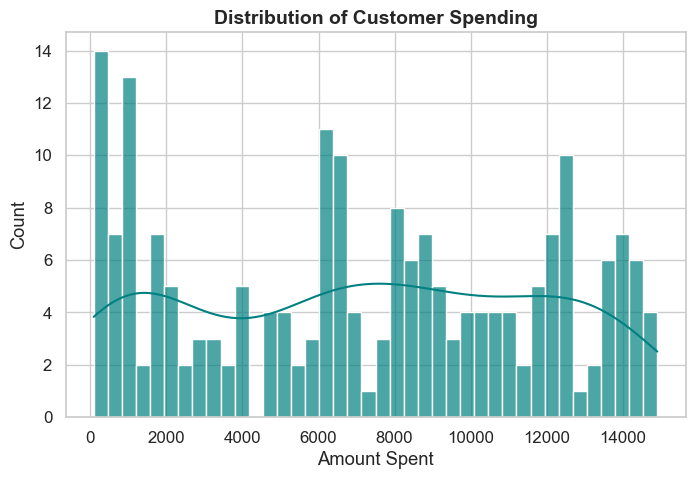

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_10200\2511669401.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="spending_category", data=df, palette="muted")


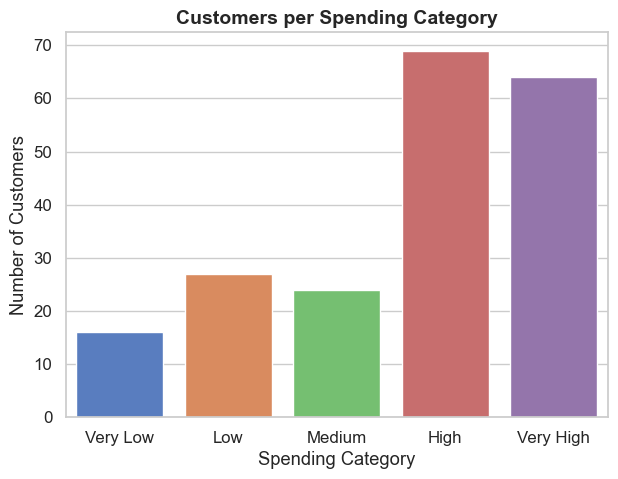

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_10200\2511669401.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="amount_spent", y="name", data=top10, palette="crest")


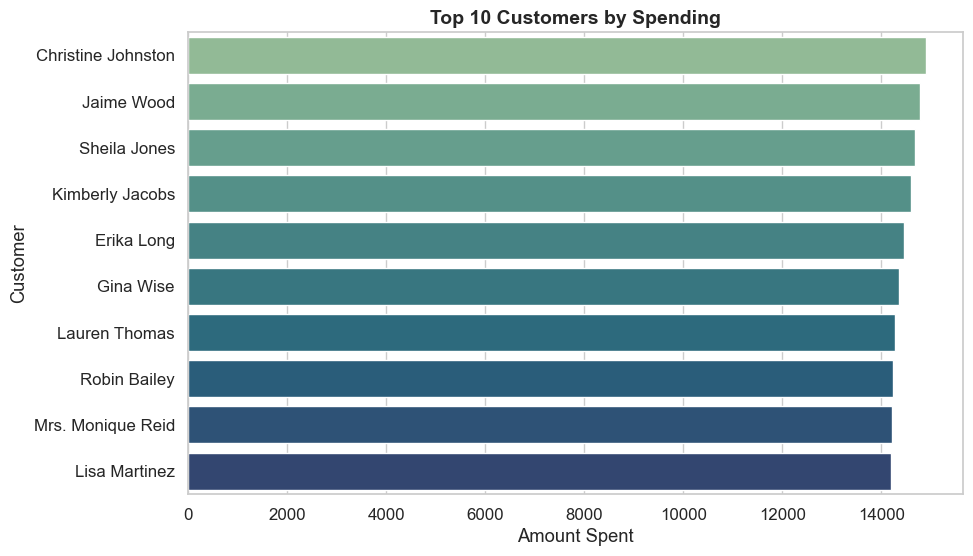

C:\Users\Prithviraj\AppData\Local\Temp\ipykernel_10200\2511669401.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_spending.values, y=country_spending.index, palette="magma")


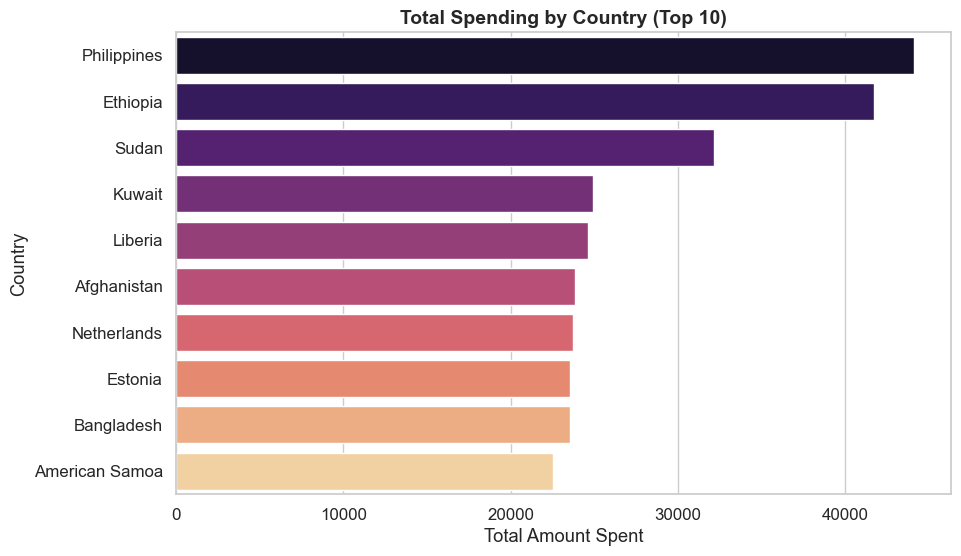

✅ Final cleaned data saved:
 - customers_cleaned_final.csv
 - customers_cleaned_final.xlsx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# SETTINGS
# -----------------------------------------
plt.style.use("seaborn-v0_8-deep")
sns.set_theme(style="whitegrid", font_scale=1.1)

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
df = pd.read_csv("customers_unstructured.csv")

print("Raw Data Overview:")
print(df.head(), "\n")
print(df.info(), "\n")

# -----------------------------------------
# DATA CLEANING
# -----------------------------------------
# Remove missing/invalid key fields
df = df.dropna(subset=["id", "name", "email", "amount_spent"]).copy()

# Remove duplicate customers (keep first)
df = df.drop_duplicates(subset="id")

# Standardize columns
df["email"] = df["email"].str.strip().str.lower()
df["address"] = df["address"].astype(str).str.replace("\n", ", ").str.strip()
df["address2"] = df.get("address2", "").astype(str).str.replace("\n", ", ").str.strip()

# Numeric conversion
df["amount_spent"] = pd.to_numeric(df["amount_spent"], errors="coerce")
df = df.dropna(subset=["amount_spent"])

# Extract city and country from address
df["city"] = df["address"].apply(lambda x: x.split(",")[1].strip() if "," in x else "Unknown")
df["country"] = df["address"].apply(lambda x: x.split(",")[-1].strip() if "," in x else "Unknown")

# Spending categories
bins = [0, 500, 2000, 5000, 10000, 20000]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
df["spending_category"] = pd.cut(df["amount_spent"], bins=bins, labels=labels, include_lowest=True)

print("\nAmount Spent Summary:")
print(df["amount_spent"].describe(), "\n")
print("Category Distribution:")
print(df["spending_category"].value_counts(), "\n")

# -----------------------------------------
# VISUALIZATIONS
# -----------------------------------------

# Spending distribution
plt.figure(figsize=(8,5))
sns.histplot(df["amount_spent"], bins=40, kde=True, color="teal", alpha=0.7)
plt.title("Distribution of Customer Spending", fontsize=14, weight="bold")
plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.show()

# Spending categories
plt.figure(figsize=(7,5))
sns.countplot(x="spending_category", data=df, palette="muted")
plt.title("Customers per Spending Category", fontsize=14, weight="bold")
plt.xlabel("Spending Category")
plt.ylabel("Number of Customers")
plt.show()

# Top 10 spenders
top10 = df.nlargest(10, "amount_spent")[["name", "amount_spent"]]
plt.figure(figsize=(10,6))
sns.barplot(x="amount_spent", y="name", data=top10, palette="crest")
plt.title("Top 10 Customers by Spending", fontsize=14, weight="bold")
plt.xlabel("Amount Spent")
plt.ylabel("Customer")
plt.show()

# Spending by country
country_spending = df.groupby("country")["amount_spent"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_spending.values, y=country_spending.index, palette="magma")
plt.title("Total Spending by Country (Top 10)", fontsize=14, weight="bold")
plt.xlabel("Total Amount Spent")
plt.ylabel("Country")
plt.show()

# -----------------------------------------
# SAVE CLEANED DATA
# -----------------------------------------
df_final = df.drop(columns=["address2", "raw_unstructured"], errors="ignore").copy()
df_final = df_final.sort_values(by="amount_spent", ascending=False)

df_final.to_csv("customers_cleaned_final.csv", index=False)
df_final.to_excel("customers_cleaned_final.xlsx", index=False)

print("✅ Final cleaned data saved:")
print(" - customers_cleaned_final.csv")
print(" - customers_cleaned_final.xlsx")
